<a href="https://colab.research.google.com/github/geunsu-jo/Hands-On-ML/blob/main/winter_semester/14_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.4.0


## SimpleRNN
* 연속된 숫자 4개를 입력으로 다음에 올 수를 예측하는 모델

In [ ]:
# 데이터 생성
X = []
y = []
for i in range(6):
  _list = list(range(i, i+4))
  X.append(list(map(lambda c: [c/10], _list)))
  y.append((i+4)/10)

In [ ]:
# 데이터 변환(numpy)
X = np.array(X)
y = np.array(y)
for i in range(len(X)):
  print(X[i], y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [ ]:
# 예측 모델
model = tf.keras.Sequential([
  tf.keras.layers.SimpleRNN(units=10, activation='tanh', return_sequences=False, input_shape=[4,1]),
  tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.1844
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1296
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0991
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0781
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0626
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0505
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0410
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0334
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0273
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0223
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0184
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0152
Epoch 13/100
1/1 [==============================] - 0s 6ms/ste

In [ ]:
print(model.predict(X))

[[0.3996377 ]
 [0.51993096]
 [0.63168836]
 [0.733853  ]
 [0.8261145 ]
 [0.9086981 ]]


## LSTM과 GRU

In [ ]:
# 데이터 생성
X = []
y = []
for i in range(3000):
  _list = np.random.rand(100)
  idx = np.random.choice(100,2,replace=False)
  zeros = np.zeros(100)
  zeros[idx] = 1
  X.append(np.array(list(zip(zeros, _list))))
  y.append(np.prod(_list[idx]))

In [ ]:
X = np.array(X)
y = np.array(y)

### SimpleRNN을 사용한 곱셈 예측 문제

In [ ]:
# 마지막 결과만 반영할 때 return_sequences=False
# 만약에, many-to-many 문제는 return_sequences=True
model = tf.keras.Sequential([
  tf.keras.layers.SimpleRNN(units=30, activation='tanh', return_sequences=True, input_shape=[100,2]),
  tf.keras.layers.SimpleRNN(units=30),
  tf.keras.layers.Dense(1)
])

model.compile(loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X[:2500], y[:2500], epochs=100, validation_split=0.2)

Epoch 1/100
63/63 [==============================] - 4s 38ms/step - loss: 0.0805 - val_loss: 0.0608
Epoch 2/100
63/63 [==============================] - 2s 30ms/step - loss: 0.0515 - val_loss: 0.0564
Epoch 3/100
63/63 [==============================] - 2s 30ms/step - loss: 0.0530 - val_loss: 0.0650
Epoch 4/100
63/63 [==============================] - 2s 32ms/step - loss: 0.0532 - val_loss: 0.0678
Epoch 5/100
63/63 [==============================] - 2s 30ms/step - loss: 0.0519 - val_loss: 0.0644
Epoch 6/100
63/63 [==============================] - 2s 30ms/step - loss: 0.0487 - val_loss: 0.0568
Epoch 7/100
63/63 [==============================] - 2s 30ms/step - loss: 0.0518 - val_loss: 0.0667
Epoch 8/100
63/63 [==============================] - 2s 30ms/step - loss: 0.0479 - val_loss: 0.0568
Epoch 9/100
63/63 [==============================] - 2s 29ms/step - loss: 0.0493 - val_loss: 0.0572
Epoch 10/100
63/63 [==============================] - 2s 29ms/step - loss: 0.0505 - val_loss: 0.0722

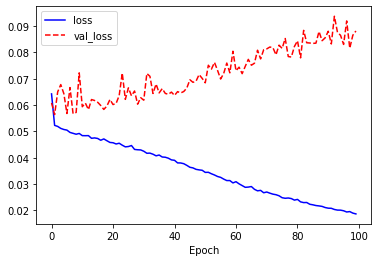

In [ ]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
prediction = model.predict(X[2500:])
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - y[2500+i]) > 0.05:
    fail += 1
print((500-fail) / 500 * 100, '%')

13.0 %


### LSTM을 사용한 곱셈 예측 문제

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.LSTM(units=30, activation='tanh', return_sequences=True, input_shape=[100,2]),
  tf.keras.layers.LSTM(units=30),
  tf.keras.layers.Dense(1)
])

model.compile(loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X[:2500], y[:2500], epochs=100, validation_split=0.2)

Epoch 1/100
63/63 [==============================] - 8s 80ms/step - loss: 0.0549 - val_loss: 0.0542
Epoch 2/100
63/63 [==============================] - 4s 71ms/step - loss: 0.0484 - val_loss: 0.0537
Epoch 3/100
63/63 [==============================] - 4s 70ms/step - loss: 0.0503 - val_loss: 0.0534
Epoch 4/100
63/63 [==============================] - 5s 73ms/step - loss: 0.0497 - val_loss: 0.0582
Epoch 5/100
63/63 [==============================] - 4s 70ms/step - loss: 0.0481 - val_loss: 0.0543
Epoch 6/100
63/63 [==============================] - 4s 71ms/step - loss: 0.0489 - val_loss: 0.0565
Epoch 7/100
63/63 [==============================] - 4s 70ms/step - loss: 0.0478 - val_loss: 0.0578
Epoch 8/100
63/63 [==============================] - 4s 70ms/step - loss: 0.0467 - val_loss: 0.0533
Epoch 9/100
63/63 [==============================] - 4s 71ms/step - loss: 0.0492 - val_loss: 0.0535
Epoch 10/100
63/63 [==============================] - 4s 71ms/step - loss: 0.0495 - val_loss: 0.0559

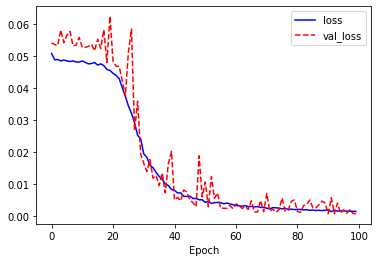

In [ ]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
prediction = model.predict(X[2500:])
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - y[2500+i]) > 0.05:
    fail += 1
print((500-fail) / 500 * 100, '%')

91.2 %


### GRU를 사용한 곱셈 예측 문제

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.GRU(units=30, activation='tanh', return_sequences=True, input_shape=[100,2]),
  tf.keras.layers.GRU(units=30),
  tf.keras.layers.Dense(1)
])

model.compile(loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X[:2500], y[:2500], epochs=100, validation_split=0.2)

Epoch 1/100
63/63 [==============================] - 9s 90ms/step - loss: 0.0547 - val_loss: 0.0598
Epoch 2/100
63/63 [==============================] - 5s 74ms/step - loss: 0.0468 - val_loss: 0.0537
Epoch 3/100
63/63 [==============================] - 5s 76ms/step - loss: 0.0476 - val_loss: 0.0535
Epoch 4/100
63/63 [==============================] - 5s 75ms/step - loss: 0.0461 - val_loss: 0.0555
Epoch 5/100
63/63 [==============================] - 5s 75ms/step - loss: 0.0519 - val_loss: 0.0542
Epoch 6/100
63/63 [==============================] - 5s 74ms/step - loss: 0.0511 - val_loss: 0.0533
Epoch 7/100
63/63 [==============================] - 5s 75ms/step - loss: 0.0494 - val_loss: 0.0531
Epoch 8/100
63/63 [==============================] - 5s 75ms/step - loss: 0.0478 - val_loss: 0.0541
Epoch 9/100
63/63 [==============================] - 5s 75ms/step - loss: 0.0473 - val_loss: 0.0540
Epoch 10/100
63/63 [==============================] - 5s 76ms/step - loss: 0.0492 - val_loss: 0.0529

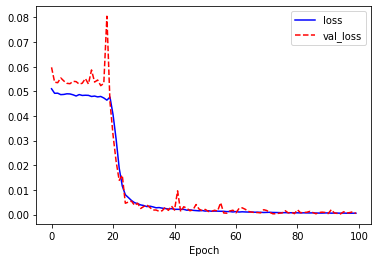

In [ ]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
prediction = model.predict(X[2500:])
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - y[2500+i]) > 0.05:
    fail += 1
print((500-fail) / 500 * 100, '%')

97.8 %
